# Código para Balanceamento de Multiclasse

Este script em Python tem como objetivo compartilhar o passo a passo para o balanceamento de multiclasse em problemas de classificação.

Nem sempre temos apenas duas classes para balancear, na verdade na maioria dos problemas do dia a dia são mais de duas classes. A técnica para balancear duas classes é conhecida, mas nem sempre resolve o problema nesses casos. Por isso aqui nesse script vamos aplicar uma fórmula para balancear mais de duas classes no dataset. Dessa forma é possível aplicar algoritmos de classificação para análise preditivas.

É um dos passos mais importantes porque garante que o modelo preditvo tenha um treino adequado, lembre-se que o aprendizado de máquina é muito parecido com o humano porque o algoritmo precisa ser exposto aos exemplos de maneira igual. Por exemplo, imagine uma criança que está aprendendo a identificar frutas, óbvio que aquele tipo de fruta que ela mais ver será a que ela vai identificar mais rápido. O algoritmo funciona de uma maneira muito parecida.

Compartilho algumas linhas de código para balanceamento multiclasse. 

Esse código tem como fonte a dica valiosa da Angelica do Luca, segue link abaixo:
https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669

Fique à vontade para sugerir mudanças no código.

# 1 - Carga dos Pacotes

In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Balanceamento Multiclasse" --iversions

Author: Balanceamento Multiclasse

seaborn   : 0.12.1
numpy     : 1.23.5
pandas    : 1.5.2
matplotlib: 3.6.2



# 2 - Carga dos Dados

A fonte de dados utilizada será o dataset com dados de qualidade relacionado a produção de vinho português.

Fonte do dataset: https://archive.ics.uci.edu/ml/datasets/wine+Quality

In [3]:
# Carregando o dataset para o balanceamento
df_red = pd.read_csv('C:/python_scripts/balanceamento_classes/dados/winequality-red.csv', sep = ';')
df_white = pd.read_csv('C:/python_scripts/balanceamento_classes/dados/winequality-white.csv', sep = ';')

print('O número de linhas e colunas do bd_red é: ', df_red.shape)
print('O número de linhas e colunas do bd_white é: ', df_white.shape)

O número de linhas e colunas do bd_red é:  (1599, 12)
O número de linhas e colunas do bd_white é:  (4898, 12)


In [4]:
# União do dataset em um só
df = df_red.append(df_white)
print('O número de linhas e colunas do dataset total é: ', df.shape)

O número de linhas e colunas do dataset total é:  (6497, 12)


In [5]:
# Mostra as 5 primeiras linhas do dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3 - Análise dos dados 

In [6]:
# Confere o número de linhas e colunas do dataset
df.shape

(6497, 12)

In [7]:
# Confere o tipo de objeto, no caso um dataframe do pandas
type(df)

pandas.core.frame.DataFrame

In [8]:
# Confere os tipos de dados, seja string ou número por exemplo. 
# Lembrando que apenas conseguimos fazer o balanceamento com variáveis númericas. Usar variáveis dummy para tipo string.

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df['quality'].unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64>

# 4 - Dados antes do Balanceamento

O total de registros é: 6497
Total de Registros com nota 3 é igual a 30 que representa 0.5 %
Total de Registros com nota 4 é igual a 216 que representa 3.3 %
Total de Registros com nota 5 é igual a 2138 que representa 32.9 %
Total de Registros com nota 6 é igual a 2836 que representa 43.7 %
Total de Registros com nota 7 é igual a 1079 que representa 16.6 %
Total de Registros com nota 8 é igual a 193 que representa 3.0 %
Total de Registros com nota 9 é igual a 5 que representa 0.1 %


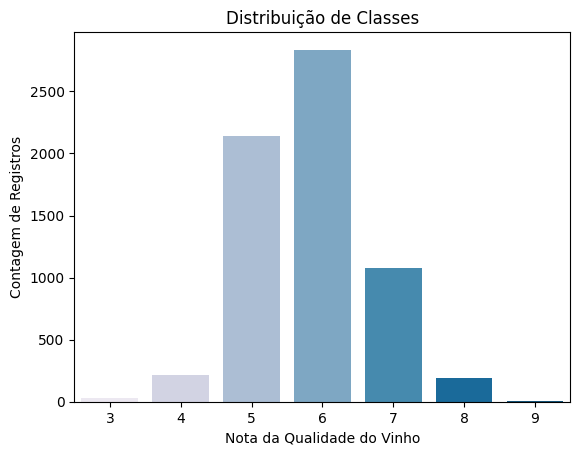

In [10]:
# Gráfico com a contagem de registros para cada classe.
# Um número ideal é em torno de 45% e 55% no máximo para cada classe.
# Fora desse range, o ideal é balancear o dataset.

# Cria plot e amarzena na variável graf_class
graf_class = sns.countplot(x = 'quality', data = df, palette = 'PuBu')

# Ajuste dos eixos X, Y e Título
graf_class.set_xlabel('Nota da Qualidade do Vinho')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição de Classes')

# Variável para contar os valores de cada classe
class_table = df['quality'].value_counts()

# Print do total de registros e bem como do percentual que cada classe representa
print('O total de registros é:', class_table.sum())
print('Total de Registros com nota 3 é igual a', class_table[3].sum(), 'que representa', round((class_table[3]/class_table.sum())*100,1),"%")
print('Total de Registros com nota 4 é igual a', class_table[4].sum(), 'que representa', round((class_table[4]/class_table.sum())*100,1),"%")
print('Total de Registros com nota 5 é igual a', class_table[5].sum(), 'que representa', round((class_table[5]/class_table.sum())*100,1),"%")
print('Total de Registros com nota 6 é igual a', class_table[6].sum(), 'que representa', round((class_table[6]/class_table.sum())*100,1),"%")
print('Total de Registros com nota 7 é igual a', class_table[7].sum(), 'que representa', round((class_table[7]/class_table.sum())*100,1),"%")
print('Total de Registros com nota 8 é igual a', class_table[8].sum(), 'que representa', round((class_table[8]/class_table.sum())*100,1),"%")
print('Total de Registros com nota 9 é igual a', class_table[9].sum(), 'que representa', round((class_table[9]/class_table.sum())*100,1),"%")

Aqui vemos que o dataset está totalmente desbalanceado e isso pode prejudicar muito o treino do modelo preditivo, ou seja, o modelo pode "aprender" muito mais um classe do que outra. Isso tende a aumentar o erro em um classe, nesse caso com valores  = 6, e errar muito menos a outra classe, com valores = 8 por exemplo.

Por isso o balanceamento é uma técnica importante em determinados momentos para garantir o resultado final mais generalista possível.

# 5 - Balanceamento de Classes

## 5.1 - Separa as variáveis em treino e teste

In [11]:
# Separa a variáveis entre target(y) e preditoras(x)
features = []
for feature in df.columns:
    if feature != 'quality':
        features.append(feature)
X = df[features]
y = df['quality']

In [12]:
# Separa o dataset em treino e teste
# Amostra de 20% para teste do total de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## 5.2 - Define variáveis e função do balaceamento multiclasse

In [13]:
# Conta os valores de cada classe
count = y_train.value_counts()
count

6    2234
5    1726
7     879
4     174
8     156
3      25
9       3
Name: quality, dtype: int64

In [14]:
# Cálcula o número de amostras que serão criadas para cada classe
n_samples = count.median().astype(np.int64)
n_samples

174

Na próxima célula será criada uma função própria para auxiliar o balacemento. 
A função recebe o dataset, o número de amostras (n_samples) e as classes (majority e minority). A função retorna um objeto dict que contém o número de amostras necessárias para o balanceamento de cada classe.

In [15]:
def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

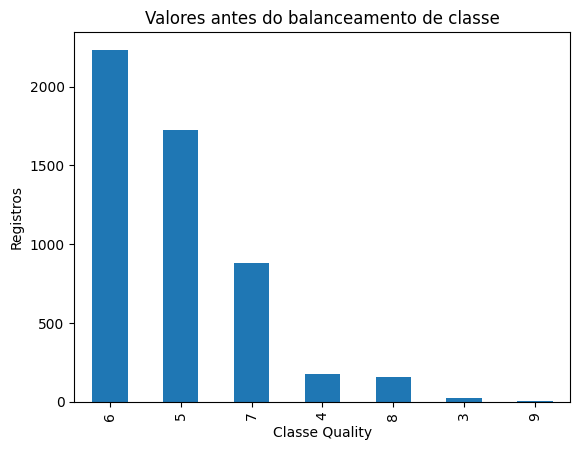

In [16]:
# Gráfico antes do balanceamento
count.plot.bar()
plt.title('Valores antes do balanceamento de classe')
plt.ylabel('Registros')
plt.xlabel('Classe Quality')
plt.show()

## 5.3 - Undersampling da amostra

Agora vamos realizar o undersampling, ou seja, as classes com maiores registros serão reduzidas com base no número de registros ideal que no nosso exemplo é o valor de n_samples (174).

In [17]:
# Realizar under_sample nas classes com maior número de registros
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [18]:
# Conta os valores de cada classe após o undersampling
count_under = y_under.value_counts()
count_under

4    174
5    174
6    174
7    174
8    156
3     25
9      3
Name: quality, dtype: int64

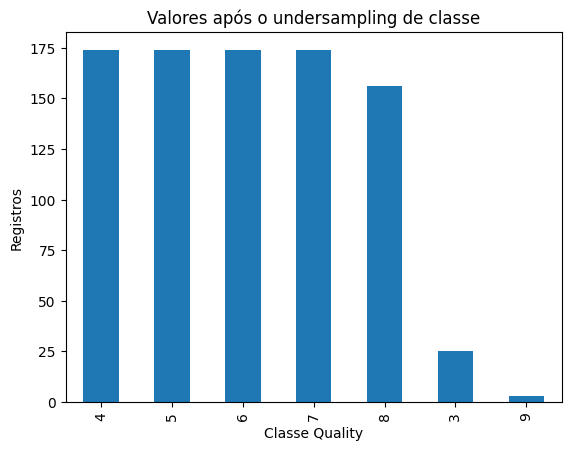

In [19]:
# Gráfico após o undersampling  das classes
count_under.plot.bar()
plt.title('Valores após o undersampling de classe')
plt.ylabel('Registros')
plt.xlabel('Classe Quality')
plt.show()

## 5.4 - Oversampling da amostra

In [20]:
# cria oversample nas classes com maior número de registros
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

In [21]:
# Conta os valores de cada classe após o undersampling
count_over = y_bal.value_counts()
count_over

3    174
4    174
5    174
6    174
7    174
8    174
9    174
Name: quality, dtype: int64

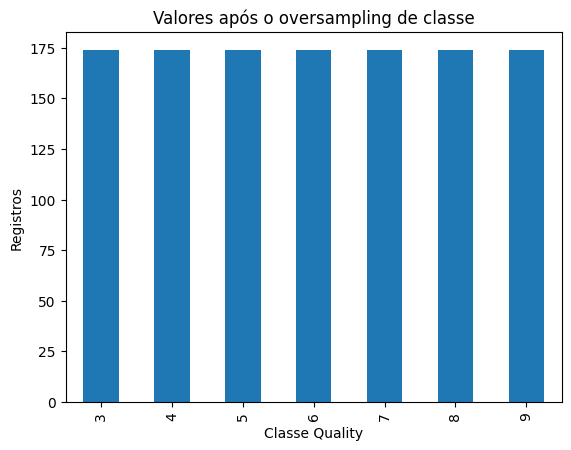

In [22]:
# Gráfico após o oversampling  das classes
count_over.plot.bar()
plt.title('Valores após o oversampling de classe')
plt.ylabel('Registros')
plt.xlabel('Classe Quality')
plt.show()

In [23]:
# Dataset com os dados balanceados
df_final = pd.concat([X_bal, y_bal], axis = 1, ignore_index = True)
df_final

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.100000,0.490000,0.220000,2.000000,0.047000,146.500000,307.500000,0.992400,3.240000,0.370000,11.000000,3
1,6.700000,0.760000,0.020000,1.800000,0.078000,6.000000,12.000000,0.996000,3.550000,0.630000,9.950000,3
2,11.600000,0.580000,0.660000,2.200000,0.074000,10.000000,47.000000,1.000800,3.250000,0.570000,9.000000,3
3,7.300000,0.980000,0.050000,2.100000,0.061000,20.000000,49.000000,0.997050,3.310000,0.550000,9.700000,3
4,8.500000,0.260000,0.210000,16.200000,0.074000,41.000000,197.000000,0.998000,3.020000,0.500000,9.800000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,7.001168,0.309416,0.415876,3.188318,0.025082,43.848136,115.964954,0.990053,3.325526,0.390350,12.801168,9
1214,8.847134,0.268736,0.455057,9.537961,0.034621,28.379300,122.609234,0.996153,3.221494,0.454943,10.716083,9
1215,7.069634,0.275183,0.467225,2.503661,0.029874,34.947592,113.910983,0.990224,3.356335,0.410890,12.869634,9
1216,8.983800,0.269419,0.452324,10.111960,0.034826,28.174300,123.360900,0.996611,3.209877,0.457676,10.545250,9


In [24]:
# Nomes das colunas para aplicar no dataset
# A função ignora os nomes das colunas
nome_coluna = df.columns.values.tolist()
nome_coluna

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [25]:
# Aplica o nome das colunas
df_final.columns = nome_coluna

df_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.49,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.00,3
1,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
2,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
3,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
4,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.99800,3.02,0.50,9.80,3


# 6 - Dados após o Balanceamento

O total de registros é: 6497
Total de Registros com nota 3 é igual a 174 que representa 14.3 %
Total de Registros com nota 4 é igual a 174 que representa 14.3 %
Total de Registros com nota 5 é igual a 174 que representa 14.3 %
Total de Registros com nota 6 é igual a 174 que representa 14.3 %
Total de Registros com nota 7 é igual a 174 que representa 14.3 %
Total de Registros com nota 8 é igual a 174 que representa 14.3 %
Total de Registros com nota 9 é igual a 174 que representa 14.3 %


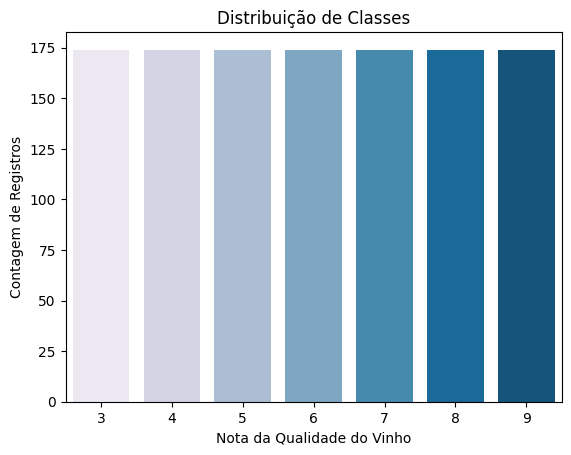

In [26]:
# Gráfico com a contagem de registros para cada classe.
# Um número ideal é em torno de 45% e 55% no máximo para cada classe.
# Fora desse range, o ideal é balancear o dataset.

# Cria plot e amarzena na variável graf_class
graf_class2 = sns.countplot(x = 'quality', data = df_final, palette = 'PuBu')

# Ajuste dos eixos X, Y e Título
graf_class2.set_xlabel('Nota da Qualidade do Vinho')
graf_class2.set_ylabel('Contagem de Registros')
graf_class2.set_title('Distribuição de Classes')

# Variável para contar os valores de cada classe
class_table2 = df_final['quality'].value_counts()

# Print do total de registros e bem como do percentual que cada classe representa
print('O total de registros é:', class_table.sum())
print('Total de Registros com nota 3 é igual a', class_table2[3].sum(), 'que representa', round((class_table2[3]/class_table2.sum())*100,1),"%")
print('Total de Registros com nota 4 é igual a', class_table2[4].sum(), 'que representa', round((class_table2[4]/class_table2.sum())*100,1),"%")
print('Total de Registros com nota 5 é igual a', class_table2[5].sum(), 'que representa', round((class_table2[5]/class_table2.sum())*100,1),"%")
print('Total de Registros com nota 6 é igual a', class_table2[6].sum(), 'que representa', round((class_table2[6]/class_table2.sum())*100,1),"%")
print('Total de Registros com nota 7 é igual a', class_table2[7].sum(), 'que representa', round((class_table2[7]/class_table2.sum())*100,1),"%")
print('Total de Registros com nota 8 é igual a', class_table2[8].sum(), 'que representa', round((class_table2[8]/class_table2.sum())*100,1),"%")
print('Total de Registros com nota 9 é igual a', class_table2[9].sum(), 'que representa', round((class_table2[9]/class_table2.sum())*100,1),"%")

Podemos ver que o dataset foi balanceado utilizado a técnica SMOTE com undersampling e oversampling. As classes com mais registros tiveram redução dos dados e as classes com menos registros tiveram input dos dados. Isso tudo com o uso do KNN no SMOTE. Dessa forma, o dataset tende a ser um pouco mais generalista do que apenas duplicar os registros. 

# 7 - Exporta o Dataset Final

In [27]:
# Cria CSV no diretório
df_final.to_csv('df_final_multiclass.csv', index = False)

Com esse script é possível balancear de maneira simples e rápida o dataset para problemas de classificação com Machine Learning. 
Lembrando que o dataset possui mais de duas classes, o que é o mais comum no dia a dia do cientista de dados. Para acessar o balanceamento de duas classes apenas, é só acessar o script balanceamento_classes.ipynb no GitHub. 

Segue link do repositório: https://github.com/marcosmorais94/balanceamento_classes